#  Imports and paths

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
logs_data_path = os.getcwd() + "/checkpoints2/samples35644_1layers_15heads_2dff"
newton_logs_data_path = logs_data_path + "/Newton_CG_lr0.001_tau10.0/"
sgd_logs_data_path = logs_data_path + "/SGD_lr0.001/"
adam_logs_data_path = logs_data_path + "/Adam_lr0.0001/"

newton_lr1_data_path = logs_data_path + "/Newton_CG_lr1.0_tau10.0/"

# Data Processing

In [99]:
from os import listdir
from os.path import isfile, join

def extract_number(f):
    s = re.findall("\d+",f)
    return int(s[0]) if s else -1, f

def get_recent_log_df(logs_path):
    log_files = [f for f in listdir(logs_path) if isfile(join(logs_path, f)) and "log" in f]
    recent_log_path = logs_path + max(log_files,key=extract_number)
    #add some error handling if file is empty
    if os.stat(recent_log_path).st_size > 100:
        return pd.read_csv(recent_log_path)
    else:
        print(f"ATTENTION! The recent log file under {recent_log_path} is empty, returning dummy log file")
        return pd.read_csv(logs_path + 'training_2.log')
    

        
adam_df = get_recent_log_df(adam_logs_data_path)
# newton_df = get_recent_log_df(newton_logs_data_path)
newton_df = pd.read_csv(newton_logs_data_path + 'training_0.log')
sgd_df = get_recent_log_df(sgd_logs_data_path)
adam_df.head()

,epoch,accuracy_function,loss,val_accuracy_function,val_loss
0,0,0.634503,1.536603,0.519358,2.688299
1,1,0.642845,1.499537,0.517021,2.685622
2,2,0.645664,1.483916,0.505919,2.739529
3,3,0.647009,1.474882,0.513887,2.715552
4,4,0.648379,1.467601,0.511424,2.701129


# Functions for generating plots

In [150]:
plt.rcParams["figure.figsize"] = [8, 4.5]
plt.rcParams["figure.autolayout"] = True

def plot_accuracy(df, headers=None, title=None, save=False):
    if headers is None:
        headers = ['epoch']
        for col in df.columns:
            if "accuracy" in col:
                headers.append(col)
                
    if 'epoch' not in headers:
        headers.append('epoch')
        
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
        
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png")
    
    
def plot_loss(df, headers=None, title=None, save=False):
    if headers is None:
        headers = ['epoch']
        for col in df.columns:
            if "loss" in col:
                headers.append(col)
                
    if 'epoch' not in headers:
        headers.append('epoch')
        
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
        
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png")
        
def plot_train_acc(df, title=None, save=False):
    headers = ['epoch']
    for col in df.columns:
        if "val. accuracy" not in col and "accuracy" in col:
            headers.append(col)
    
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
    plt.ylabel("validation accuracy")
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png", )
    
        
def plot_val_acc(df, title = None, save=False):
    headers = ['epoch']
    for col in df.columns:
        if "val. accuracy" in col:
            headers.append(col)
    
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
        
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png")
        
def plot_train_loss(df, title=None, save=False):
    headers = ['epoch']
    for col in df.columns:
        if "val. loss" not in col and "loss" in col:
            headers.append(col)
    
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
    
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png")
        
def plot_val_loss(df, title = None, save=False):
    headers = ['epoch']
    for col in df.columns:
        if "val. loss" in col:
            headers.append(col)
    
    df_plot = df[headers]
    ax = df_plot.set_index('epoch').plot()
    
    if title is not None:
        ax.set_title(title)
    
    if save:
        plt.savefig("/Users/danylomovchan/Downloads/" + title + ".png")

In [101]:

def rename_df(df, acc, acc_v, loss, loss_v):
    return df.rename(
    {'accuracy_function': acc,
     'val_accuracy_function': acc_v,
     'loss': loss,
     'val_loss': loss_v}, axis=1)

def rename_df_all(df, df_name):
    acc = " accuracy"
    acc_v = " val. accuracy"
    loss = " loss"
    loss_v = " val. loss"
    return df.rename(
    {'accuracy_function': df_name + acc,
     'val_accuracy_function': df_name + acc_v,
     'loss': df_name + loss,
     'val_loss': df_name + loss_v}, axis=1)

In [102]:

def merge_all(df_arr):
    result = df_arr.pop()
    for df in df_arr:
        result = result.merge(df, how="left", left_on="epoch", right_on="epoch")
    return result

## Newton CG

,epoch,accuracy_function,loss,val_accuracy_function,val_loss
45,45,0.642453,1.497771,0.514297,2.706650
46,46,0.642124,1.496906,0.509696,2.714526
47,47,0.641452,1.497852,0.520614,2.709408
48,48,0.642246,1.495865,0.509364,2.712095
49,49,0.641724,1.497859,0.513726,2.723092


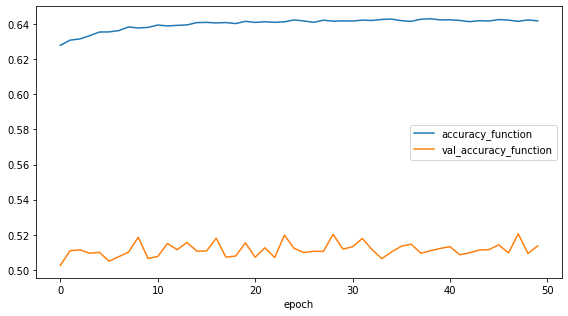

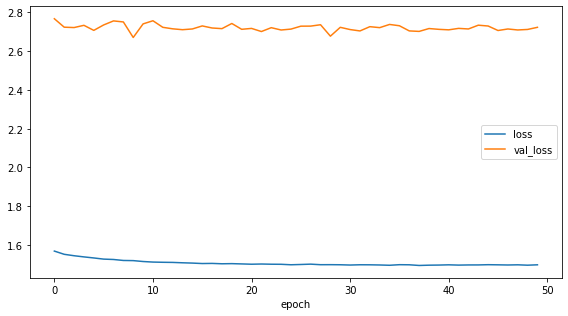

In [103]:
plot_accuracy(newton_df)
plot_loss(newton_df)
newton_df.tail()

## Adam

In [104]:
# plot_accuracy(adam_df)
# plot_loss(adam_df)

## SGD

In [105]:
# plot_accuracy(sgd_df)
# plot_loss(sgd_df)

# Comparison

In [106]:
# names
adam_acc = 'Adam accuracy'
adam_acc_v = 'Adam val. accuracy'
adam_loss = 'Adam loss'
adam_loss_v = 'Adam val. loss'

newton_acc = 'Newton accuracy'
newton_acc_v = 'Newton val. accuracy'
newton_loss = 'Newton loss'
newton_loss_v = 'Newton val. loss'

newton_exp1_acc = 'Newton exp accuracy'
newton_exp1_acc_v = 'Newton exp val. accuracy'
newton_exp1_loss = 'Newton exp loss'
newton_exp1_loss_v = 'Newton exp val. loss'

newton_time1_acc = 'Newton time-bs. accuracy'
newton_time1_acc_v = 'Newton time-bs. val. accuracy'
newton_time1_loss = 'Newton time-bs. loss'
newton_time1_loss_v = 'Newton time-bs. val. loss'

sgd_acc = 'SGD accuracy'
sgd_acc_v = 'SGD val. accuracy'
sgd_loss = 'SGD loss'
sgd_loss_v = 'SGD val. loss'

adam_gr_df = rename_df(adam_df, adam_acc, adam_acc_v, adam_loss, adam_loss_v)
newton_gr_df = rename_df(newton_df, newton_acc, newton_acc_v, newton_loss, newton_loss_v)
sgd_gr_df = rename_df(sgd_df, sgd_acc, sgd_acc_v, sgd_loss, sgd_loss_v)


## Adam vs Newton CG

,epoch,Adam accuracy,Adam loss,Adam val. accuracy,Adam val. loss,Newton accuracy,Newton loss,Newton val. accuracy,Newton val. loss
45,45,0.680605,1.294840,0.516095,2.745014,0.642453,1.497771,0.514297,2.706650
46,46,0.682182,1.290435,0.506713,2.783357,0.642124,1.496906,0.509696,2.714526
47,47,0.682561,1.287484,0.511608,2.779394,0.641452,1.497852,0.520614,2.709408
48,48,0.683450,1.284965,0.512964,2.744113,0.642246,1.495865,0.509364,2.712095
49,49,0.683137,1.281931,0.507424,2.796608,0.641724,1.497859,0.513726,2.723092


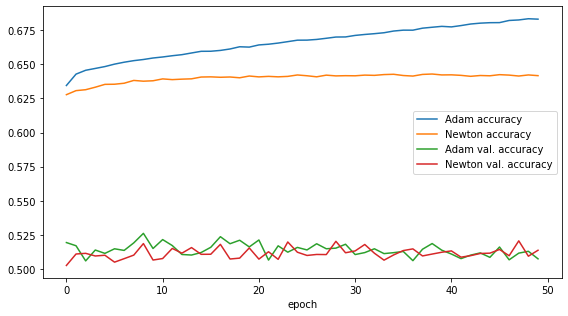

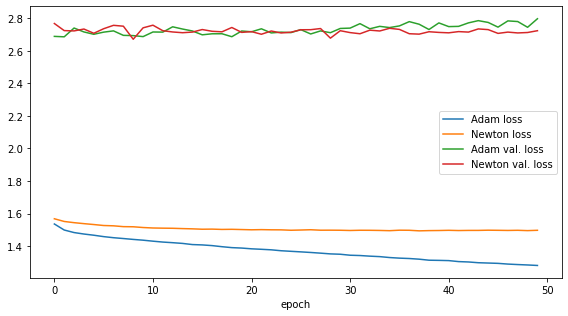

In [107]:
adam_newton_df = adam_gr_df.merge(newton_gr_df, how="left", left_on="epoch", right_on="epoch") 

plot_accuracy(adam_newton_df, headers=['epoch', adam_acc, newton_acc, adam_acc_v, newton_acc_v])
plot_loss(adam_newton_df, headers=['epoch', adam_loss, newton_loss, adam_loss_v, newton_loss_v])
adam_newton_df.tail()

## Adam vs SGD

In [108]:
adam_sgd_df = adam_gr_df.merge(sgd_gr_df, how="left", left_on="epoch", right_on="epoch")

# plot_accuracy(adam_sgd_df, headers=['epoch', adam_acc, sgd_acc, adam_acc_v, sgd_acc_v])
# plot_loss(adam_sgd_df, headers=['epoch', adam_loss, sgd_loss, adam_loss_v, sgd_loss_v])

## SGD vs Newton

In [109]:
sgd_newton_df = sgd_gr_df.merge(newton_gr_df, how="left", left_on="epoch", right_on="epoch")

# plot_accuracy(sgd_newton_df, headers=['epoch', sgd_acc, newton_acc, sgd_acc_v, newton_acc_v])
# plot_loss(sgd_newton_df, headers=['epoch', sgd_loss, newton_loss, sgd_loss_v, newton_loss_v])

## Trying out different schedulers on SGD

In [110]:
sgd_exp_df = pd.read_csv(sgd_logs_data_path + 'training_5.log')
sgd_exp_df = sgd_exp_df.rename(
    {'accuracy_function': 'Accuracy exp-lr',
     'val_accuracy_function': 'Val. Accuracy exp-lr',
     'loss': 'Loss exp-lr',
     'val_loss': 'Val. Loss exp-lr'}, axis=1)
sgd_exp_df.head()

sgd_timebased_df = pd.read_csv(sgd_logs_data_path + 'training_6.log')
sgd_timebased_df = sgd_timebased_df.rename(
    {'accuracy_function': 'Accuracy time-lr',
     'val_accuracy_function': 'Val. Accuracy time-lr',
     'loss': 'Loss time-lr',
     'val_loss': 'Val. Loss time-lr'}, axis=1)

sgd_step_df = pd.read_csv(sgd_logs_data_path + 'training_7.log')
sgd_step_df = sgd_step_df.rename(
    {'accuracy_function': 'Accuracy step-lr',
     'val_accuracy_function': 'Val. Accuracy step-lr',
     'loss': 'Loss step-lr',
     'val_loss': 'Val. Loss step-lr'}, axis=1)

sgd_lr_df = sgd_exp_df.merge(sgd_timebased_df, how="left", left_on="epoch", right_on="epoch")
sgd_lr_df = sgd_lr_df.merge(sgd_step_df, how="left", left_on="epoch", right_on="epoch")
sgd_lr_df.head()

,epoch,Accuracy exp-lr,Loss exp-lr,Val. Accuracy exp-lr,Val. Loss exp-lr,Accuracy time-lr,Loss time-lr,Val. Accuracy time-lr,Val. Loss time-lr,Accuracy step-lr,Loss step-lr,Val. Accuracy step-lr,Val. Loss step-lr
0,0,0.633816,1.535656,0.514231,2.717132,0.634257,1.536027,0.511976,2.704636,0.635127,1.535029,0.512707,2.712364
1,1,0.641777,1.500938,0.512724,2.730610,0.640729,1.501981,0.519500,2.683652,0.639830,1.505658,0.510779,2.695326
2,2,0.643748,1.489802,0.513729,2.691330,0.643244,1.491558,0.516890,2.680082,0.642949,1.489348,0.516078,2.720240
3,3,0.646085,1.478991,0.518135,2.714210,0.646134,1.478963,0.505196,2.728202,0.645202,1.478976,0.515208,2.705191
4,4,0.647996,1.469182,0.518679,2.714438,0.647420,1.471837,0.517258,2.710250,0.646881,1.470780,0.515423,2.723493


In [111]:
# plot_accuracy(sgd_lr_df, ['Accuracy exp-lr', 'Accuracy time-lr', 'Accuracy step-lr', 'Val. Accuracy exp-lr', 'Val. Accuracy time-lr', 'Val. Accuracy step-lr'], title="Accuracy comparison", save=True)
# plot_loss(sgd_lr_df, ['Loss exp-lr', 'Loss time-lr', 'Loss step-lr', 'Val. Loss exp-lr', 'Val. Loss time-lr', 'Val. Loss step-lr'], title="Loss comparison", save=True)

## Trying out different schedulers on Adam

In [112]:
adam_exp_df = pd.read_csv(adam_logs_data_path + 'training_13.log')
adam_exp_df = adam_exp_df.rename(
    {'accuracy_function': 'Accuracy exp-lr',
     'val_accuracy_function': 'Val. Accuracy exp-lr',
     'loss': 'Loss exp-lr',
     'val_loss': 'Val. Loss exp-lr'}, axis=1)
adam_exp_df.head()

adam_timebased_df = pd.read_csv(adam_logs_data_path + 'training_14.log')
adam_timebased_df = adam_timebased_df.rename(
    {'accuracy_function': 'Accuracy time-lr',
     'val_accuracy_function': 'Val. Accuracy time-lr',
     'loss': 'Loss time-lr',
     'val_loss': 'Val. Loss time-lr'}, axis=1)

adam_step_df = pd.read_csv(adam_logs_data_path + 'training_15.log')
adam_step_df = adam_step_df.rename(
    {'accuracy_function': 'Accuracy step-lr',
     'val_accuracy_function': 'Val. Accuracy step-lr',
     'loss': 'Loss step-lr',
     'val_loss': 'Val. Loss step-lr'}, axis=1)

adam_lr_df = sgd_exp_df.merge(adam_timebased_df, how="left", left_on="epoch", right_on="epoch")
adam_lr_df = adam_lr_df.merge(adam_step_df, how="left", left_on="epoch", right_on="epoch")
adam_lr_df.head()

,epoch,Accuracy exp-lr,Loss exp-lr,Val. Accuracy exp-lr,Val. Loss exp-lr,Accuracy time-lr,Loss time-lr,Val. Accuracy time-lr,Val. Loss time-lr,Accuracy step-lr,Loss step-lr,Val. Accuracy step-lr,Val. Loss step-lr
0,0,0.633816,1.535656,0.514231,2.717132,0.634560,1.535564,0.510894,2.703028,0.634720,1.535107,0.515344,2.670007
1,1,0.641777,1.500938,0.512724,2.730610,0.642600,1.498267,0.513401,2.697291,0.642068,1.496214,0.521253,2.670043
2,2,0.643748,1.489802,0.513729,2.691330,0.645044,1.482867,0.516313,2.706430,0.645095,1.483557,0.521313,2.661133
3,3,0.646085,1.478991,0.518135,2.714210,0.647175,1.474018,0.511277,2.710092,0.646350,1.472284,0.520435,2.680894
4,4,0.647996,1.469182,0.518679,2.714438,0.648628,1.465851,0.512997,2.713507,0.649545,1.464730,0.516038,2.692846


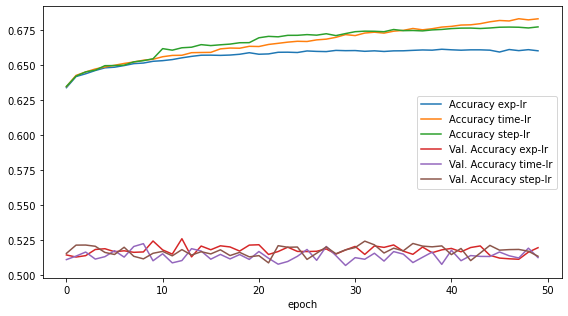

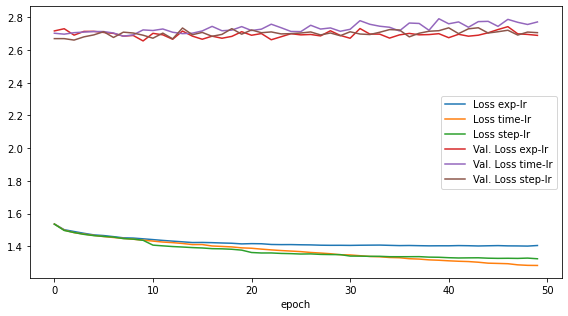

In [113]:
plot_accuracy(adam_lr_df, ['Accuracy exp-lr', 'Accuracy time-lr', 'Accuracy step-lr', 'Val. Accuracy exp-lr', 'Val. Accuracy time-lr', 'Val. Accuracy step-lr'])
plot_loss(adam_lr_df, ['Loss exp-lr', 'Loss time-lr', 'Loss step-lr', 'Val. Loss exp-lr', 'Val. Loss time-lr', 'Val. Loss step-lr'])

# CG + Custom learning rates

# exponential lr scheduler + (start lr 1.0)

In [114]:
exp_lr1_df = pd.read_csv(newton_lr1_data_path + "exp_lr.log")

newton_exp_gr_df = rename_df(exp_lr1_df, newton_exp1_acc, newton_exp1_acc_v, newton_exp1_loss, newton_exp1_loss_v)

standart_cg_vs_exp = newton_gr_df.merge(newton_exp_gr_df, how="left", left_on="epoch", right_on="epoch")

In [115]:
# plot_accuracy(exp_lr1_df)
# plot_loss(exp_lr1_df)
# exp_lr1_df.tail()

# time-based lr scheduler + (start lr 1.0)

In [116]:
time_lr1_df = pd.read_csv(newton_lr1_data_path + "time-based_lr.log")

newton_time1_acc = 'Newton time-bs. accuracy'
newton_time1_acc_v = 'Newton time-bs. val. accuracy'
newton_time1_loss = 'Newton time-bs. loss'
newton_time1_loss_v = 'Newton time-bs. val. loss'

newton_time_gr_df = rename_df(time_lr1_df, newton_time1_acc, newton_time1_acc_v, newton_time1_loss, newton_time1_loss_v)
newton_time_gr_df.tail()

,epoch,Newton time-bs. accuracy,Newton time-bs. loss,Newton time-bs. val. accuracy,Newton time-bs. val. loss
45,45,0.641915,1.489365,0.507195,2.742153
46,46,0.642437,1.488778,0.512611,2.703116
47,47,0.641065,1.490572,0.504839,2.715880
48,48,0.641287,1.489060,0.515231,2.721404
49,49,0.642456,1.487581,0.508809,2.742236


# step-wise lr scheduler + (start lr 1.0)

In [117]:
step_lr1_df = pd.read_csv(newton_lr1_data_path + "step-wise_lr.log")

newton_step1_acc = 'Newton step-wise accuracy'
newton_step1_acc_v = 'Newton step-wise val. accuracy'
newton_step1_loss = 'Newton step-wise loss'
newton_step1_loss_v = 'Newton step-wise val. loss'

step_lr1_df = rename_df(step_lr1_df, newton_step1_acc, newton_step1_acc_v, newton_step1_loss, newton_step1_loss_v)

step_lr1_df.tail()

,epoch,Newton step-wise accuracy,Newton step-wise loss,Newton step-wise val. accuracy,Newton step-wise val. loss
45,45,0.661131,1.392086,0.513006,2.757662
46,46,0.661940,1.391255,0.512754,2.693347
47,47,0.662465,1.391211,0.509175,2.740561
48,48,0.661228,1.389765,0.515312,2.706853
49,49,0.662356,1.389295,0.513099,2.716483


# default cg (lr = 0.001) VS cg with exp/time/step lr scheduler (start lr = 1.0)

,epoch,Newton with CLR accuracy,Newton with CLR loss,Newton with CLR val. accuracy,Newton with CLR val. loss,Newton accuracy,Newton loss,Newton val. accuracy,Newton val. loss,Newton exp accuracy,...,Newton exp val. accuracy,Newton exp val. loss,Newton time-bs. accuracy,Newton time-bs. loss,Newton time-bs. val. accuracy,Newton time-bs. val. loss,Newton step-wise accuracy,Newton step-wise loss,Newton step-wise val. accuracy,Newton step-wise val. loss
45,45,0.640613,1.504853,0.507978,2.729839,0.642453,1.497771,0.514297,2.706650,0.660671,...,0.517962,2.682220,0.641915,1.489365,0.507195,2.742153,0.661131,1.392086,0.513006,2.757662
46,46,0.641388,1.502667,0.517080,2.727517,0.642124,1.496906,0.509696,2.714526,0.660647,...,0.515221,2.701077,0.642437,1.488778,0.512611,2.703116,0.661940,1.391255,0.512754,2.693347
47,47,0.640006,1.505935,0.509737,2.724334,0.641452,1.497852,0.520614,2.709408,0.661057,...,0.513565,2.730463,0.641065,1.490572,0.504839,2.715880,0.662465,1.391211,0.509175,2.740561
48,48,0.640722,1.505965,0.508548,2.733293,0.642246,1.495865,0.509364,2.712095,0.661148,...,0.519516,2.692173,0.641287,1.489060,0.515231,2.721404,0.661228,1.389765,0.515312,2.706853
49,49,0.640303,1.503957,0.507898,2.757883,0.641724,1.497859,0.513726,2.723092,0.661697,...,0.515404,2.673890,0.642456,1.487581,0.508809,2.742236,0.662356,1.389295,0.513099,2.716483


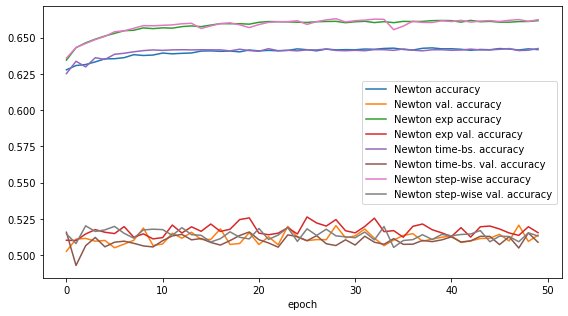

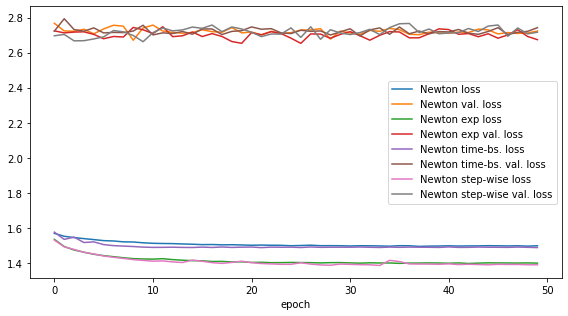

In [124]:
standart_cg_vs_exp = newton_gr_df.merge(newton_exp_gr_df, how="left", left_on="epoch", right_on="epoch")

standart_cg_vs_exp_vs_time = standart_cg_vs_exp.merge(newton_time_gr_df, how="left", left_on="epoch", right_on="epoch")
standart_cg_vs_exp_time_step = standart_cg_vs_exp_vs_time.merge(step_lr1_df, how="left", left_on="epoch", right_on="epoch")


plot_accuracy(standart_cg_vs_exp_time_step, [newton_acc, newton_acc_v, newton_exp1_acc, newton_exp1_acc_v, newton_time1_acc, newton_time1_acc_v, newton_step1_acc, newton_step1_acc_v])
plot_loss(standart_cg_vs_exp_time_step, [newton_loss, newton_loss_v, newton_exp1_loss, newton_exp1_loss_v, newton_time1_loss, newton_time1_loss_v, newton_step1_loss, newton_step1_loss_v])
standart_cg_vs_exp_time_step.tail()

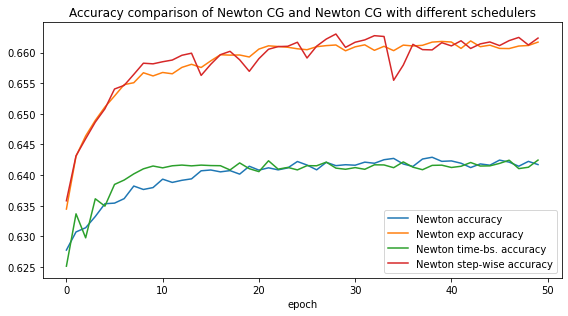

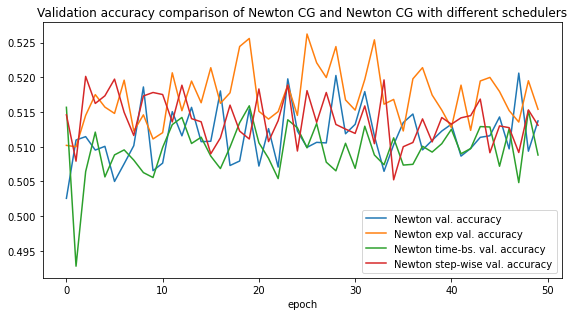

In [119]:
plot_train_acc(standart_cg_vs_exp_time_step, title="Accuracy comparison of Newton CG and Newton CG with different schedulers")
plot_val_acc(standart_cg_vs_exp_time_step, title="Validation accuracy comparison of Newton CG and Newton CG with different schedulers")

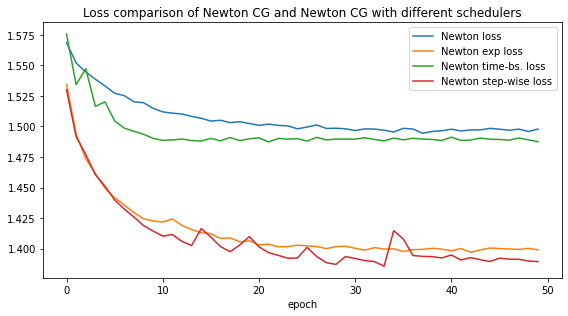

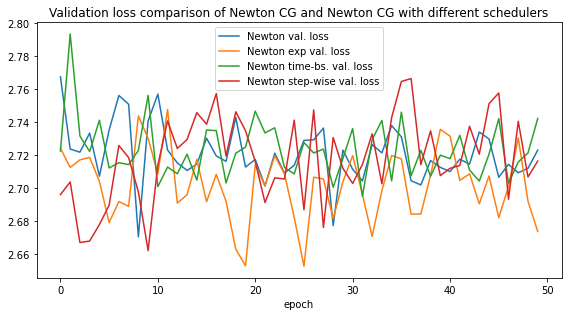

In [120]:
plot_train_loss(standart_cg_vs_exp_time_step, title="Loss comparison of Newton CG and Newton CG with different schedulers")
plot_val_loss(standart_cg_vs_exp_time_step, title="Validation loss comparison of Newton CG and Newton CG with different schedulers")

# Does holding lr constant for first 10 epochs help? 

In [121]:
const_exp_lr1_df = pd.read_csv(newton_lr1_data_path + "10const_exp_lr.log")
const_exp_acc = 'Newton 10 const exp. accuracy'
const_exp_acc_v = 'Newton 10 const exp. val. accuracy'
const_exp_loss = 'Newton 10 const exp. loss'
const_exp_loss_v = 'Newton 10 const exp. val. loss'

const_exp_lr1_df = rename_df(const_exp_lr1_df, const_exp_acc, const_exp_acc_v, const_exp_loss, const_exp_loss_v)

const_exp_vs_exp_df = newton_exp_gr_df.merge(const_exp_lr1_df, how="left", left_on="epoch", right_on="epoch")
const_exp_vs_exp_df.tail()

,epoch,Newton exp accuracy,Newton exp loss,Newton exp val. accuracy,Newton exp val. loss,Newton 10 const exp. accuracy,Newton 10 const exp. loss,Newton 10 const exp. val. accuracy,Newton 10 const exp. val. loss
45,45,0.660671,1.399957,0.517962,2.682220,0.667000,1.368062,0.518883,2.714416
46,46,0.660647,1.399652,0.515221,2.701077,0.666858,1.366835,0.515000,2.729519
47,47,0.661057,1.399241,0.513565,2.730463,0.666948,1.368411,0.522656,2.674818
48,48,0.661148,1.400158,0.519516,2.692173,0.667453,1.367640,0.513265,2.760679
49,49,0.661697,1.398882,0.515404,2.673890,0.666730,1.367890,0.515940,2.737594


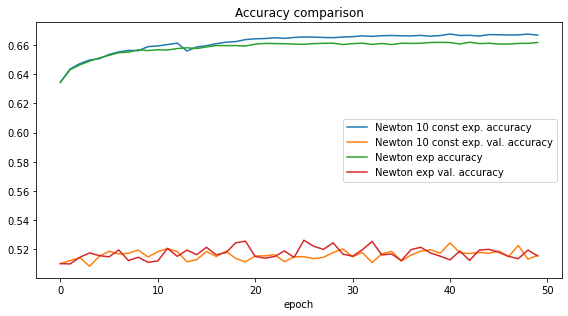

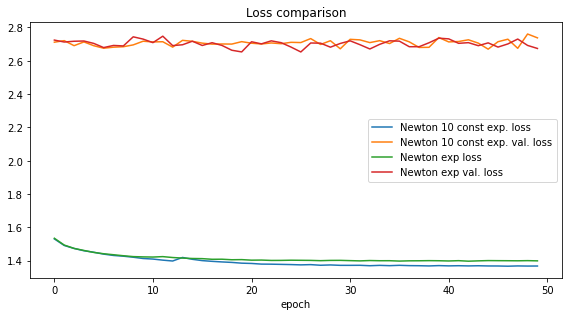

In [122]:
plot_accuracy(const_exp_vs_exp_df, [const_exp_acc, const_exp_acc_v, newton_exp1_acc, newton_exp1_acc_v], title="Accuracy comparison")
plot_loss(const_exp_vs_exp_df, [const_exp_loss, const_exp_loss_v, newton_exp1_loss, newton_exp1_loss_v], title="Loss comparison")

## Adam vs Newton vs SGD vs Newton with custom lr (10 first epochs const, later exp starting from 1.0)

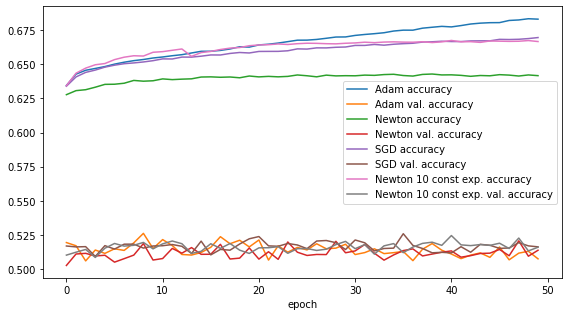

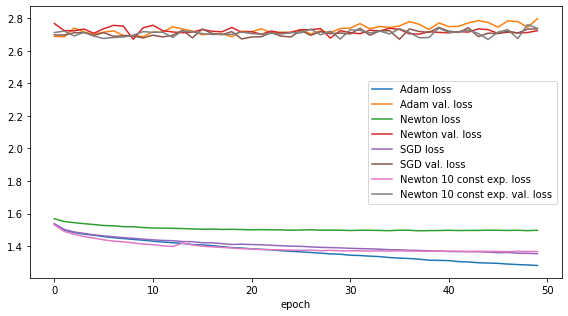

In [131]:
adam_newton_sgd_df = adam_newton_df.merge(sgd_gr_df, how="left", left_on="epoch", right_on="epoch")

adam_newton_sgd_df = adam_newton_sgd_df.merge(const_exp_lr1_df, how="left", left_on="epoch", right_on="epoch")
#  const_exp_acc, const_exp_acc_v
# const_exp_loss, const_exp_loss_v
# plot_accuracy(adam_newton_sgd_df, headers=['epoch', adam_acc, newton_acc, sgd_acc, adam_acc_v, newton_acc_v, sgd_acc_v, const_exp_acc, const_exp_acc_v], title="Accuracy: Newton-CG with scheduler vs Adam vs SGD vs Newton CG")
# plot_loss(adam_newton_sgd_df, headers=['epoch', adam_loss, newton_loss, sgd_loss, adam_loss_v, newton_loss_v, sgd_loss_v, const_exp_loss, const_exp_loss_v], title="Loss: Newton-CG with scheduler vs Adam vs SGD vs Newton CG")

# adam_newton_sgd_df = merge_all([adam_newton_sgd_df, clr_triag2_df])

plot_accuracy(adam_newton_sgd_df)
plot_loss(adam_newton_sgd_df)

# Newton CG with 10 const, exp lr, start lr = 2.0 => makes no sence 

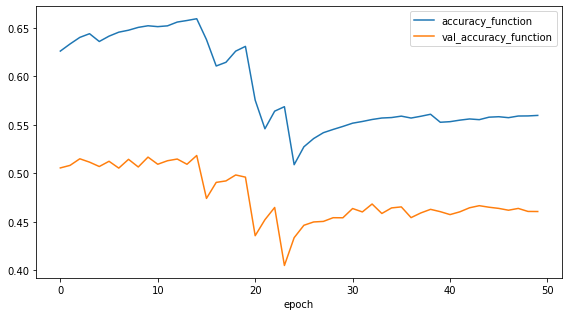

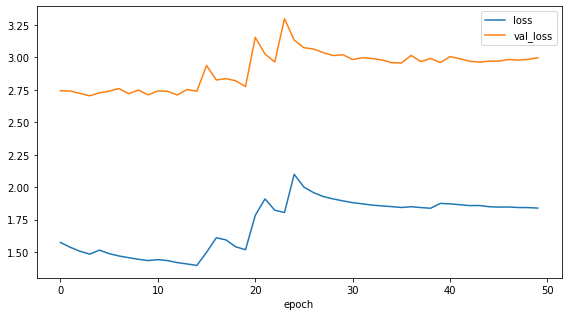

In [77]:
newton_lr2_data_path = logs_data_path + "/Newton_CG_lr2.0_tau10.0/"
const_exp_lr2_df = pd.read_csv(newton_lr2_data_path + "const10_exp_lr2.log")

plot_accuracy(const_exp_lr2_df)
plot_loss(const_exp_lr2_df)

# Newton-CG with different constant learning rates 

In [115]:
newton_1_data_path = logs_data_path + "/Newton_CG_lr1.0_tau10.0/" + "const1_lr.log"
newton_1_df = pd.read_csv(newton_1_data_path)
newton_1_df = rename_df(newton_1_df, "lr = 1.0")

newton_01_data_path = logs_data_path + "/Newton_CG_lr0.1_tau10.0/" + "const01_lr.log"
newton_01_df = pd.read_csv(newton_01_data_path)
newton_01_df = rename_df(newton_01_df, "lr = 0.1")

newton_001_data_path = logs_data_path + "/Newton_CG_lr0.01_tau10.0/" + "const001_lr.log"
newton_001_df = pd.read_csv(newton_001_data_path)
newton_001_df = rename_df(newton_001_df, "lr = 0.01")

newton_05_data_path = logs_data_path + "/Newton_CG_lr0.5_tau10.0/" + "const05_lr.log"
newton_05_df = pd.read_csv(newton_05_data_path)
newton_05_df = rename_df(newton_05_df, "lr = 0.5")

newton_0001_df = rename_df(newton_df, "lr = 0.001")

newton_const_lrs_df = merge_all([newton_05_df, newton_01_df, newton_001_df, newton_0001_df, newton_1_df])

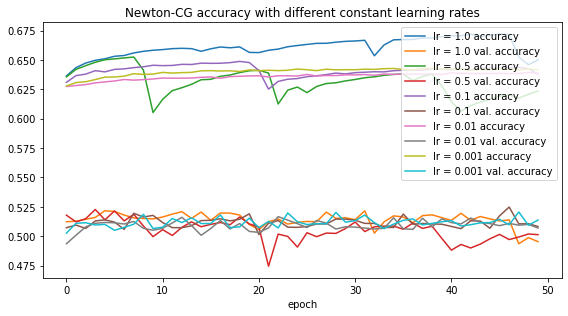

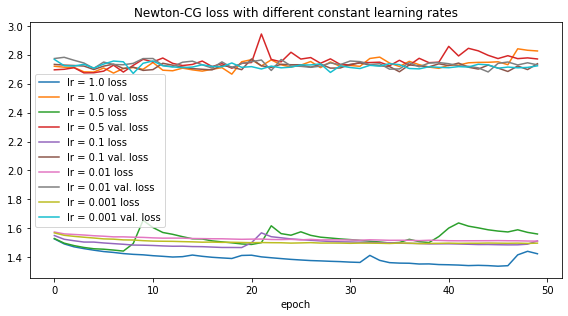

In [120]:
plot_accuracy(newton_const_lrs_df, title="Newton-CG accuracy with different constant learning rates")
plot_loss(newton_const_lrs_df, title="Newton-CG loss with different constant learning rates")

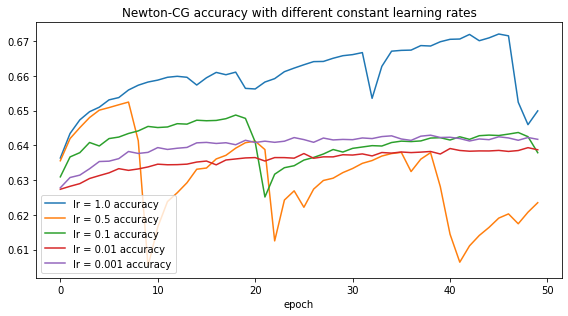

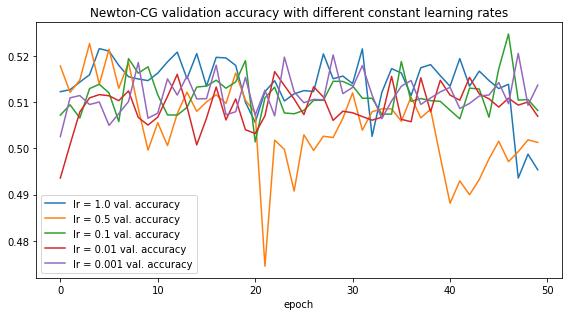

In [149]:
plot_train_acc(newton_const_lrs_df, title="Newton-CG accuracy with different constant learning rates")
plot_val_acc(newton_const_lrs_df, title="Newton-CG validation accuracy with different constant learning rates")

In [133]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

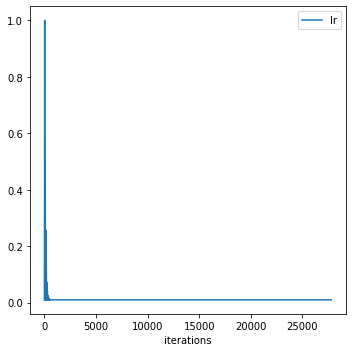

In [134]:
clr_df = pd.read_csv(os.getcwd() + "/CLR001_1-step26.csv")
clr_df.head()

df_plot = clr_df[["lr", "iterations"]]
ax = df_plot.set_index('iterations').plot()

In [135]:
plot_train_loss(newton_const_lrs_df, title="Newton-CG loss with different constant learning rates")
plot_val_loss(newton_const_lrs_df, title="Newton-CG validation loss with different constant learning rates")

NameError: name 'newton_const_lrs_df' is not defined

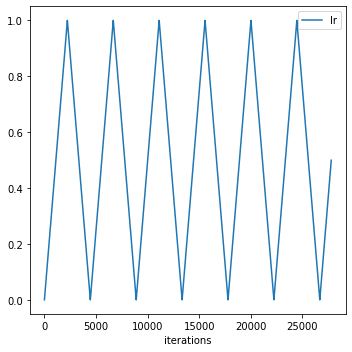

In [140]:
clr_df = pd.read_csv(os.getcwd() + "/CLR0001-1-step2224_triag.csv")
clr_df.head()

df_plot = clr_df[["lr", "iterations"]]
ax = df_plot.set_index('iterations').plot()

# plt.savefig("/Users/danylomovchan/Downloads/" + "triangular" + ".pdf")

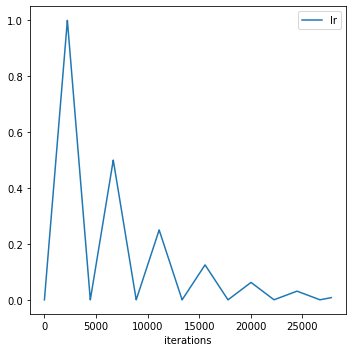

In [139]:
clr_df = pd.read_csv(os.getcwd() + "/CLR0001-1-step2224.csv")
clr_df.head()

df_plot = clr_df[["lr", "iterations"]]
ax = df_plot.set_index('iterations').plot()

# plt.savefig("/Users/danylomovchan/Downloads/" + "triangular2" + ".pdf")

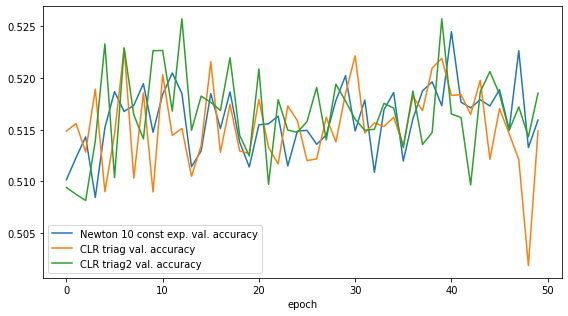

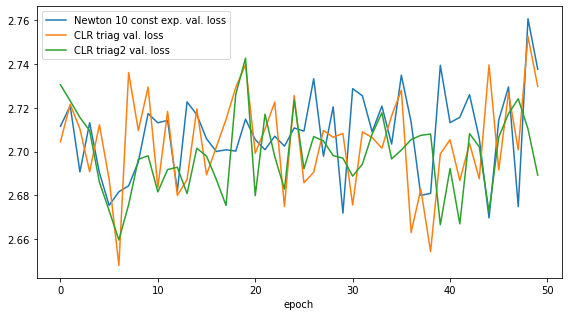

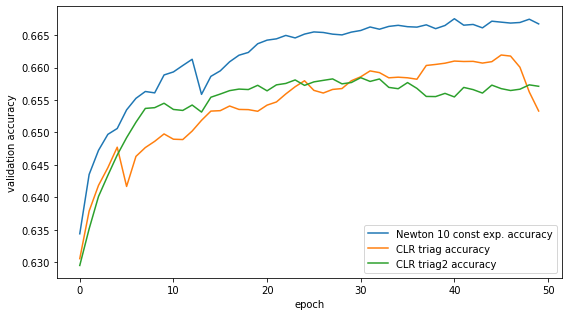

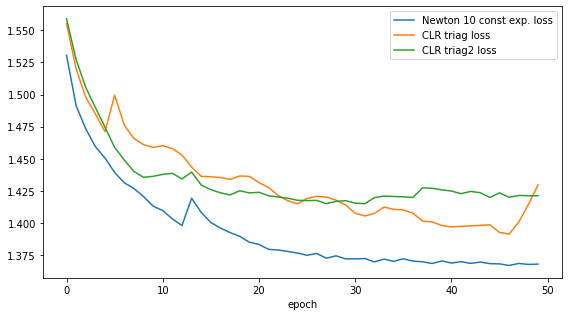

In [151]:
clr_data_path = logs_data_path + "/Newton_CG_lr0.001_tau10.0/" + "clr_triangular2.log"
clr_triag2_df = pd.read_csv(clr_data_path)
clr_triag2_df = rename_df_all(clr_triag2_df, "CLR triag2")

clr_data_triag_path = logs_data_path + "/Newton_CG_lr0.001_tau10.0/" + "triag.log"
clr_triag_df = pd.read_csv(clr_data_triag_path)
clr_triag_df = rename_df_all(clr_triag_df, "CLR triag")

clr_df = merge_all([clr_triag_df, clr_triag2_df, const_exp_lr1_df])

plot_val_acc(clr_df)
plot_val_loss(clr_df)

# triag2 does better in val. accuracy the first 30 epochs
# the validation loss from triag2 also doesn't explode close to the end

plot_train_acc(clr_df)
plot_train_loss(clr_df)

,epoch,Newton with CLR accuracy,Newton with CLR loss,Newton with CLR val. accuracy,Newton with CLR val. loss
0,0,0.632158,1.541689,0.508242,2.734845
1,1,0.634904,1.530326,0.513242,2.724410
2,2,0.636204,1.528174,0.504793,2.747494
3,3,0.635633,1.528863,0.506667,2.748967
4,4,0.635366,1.526956,0.506956,2.732199


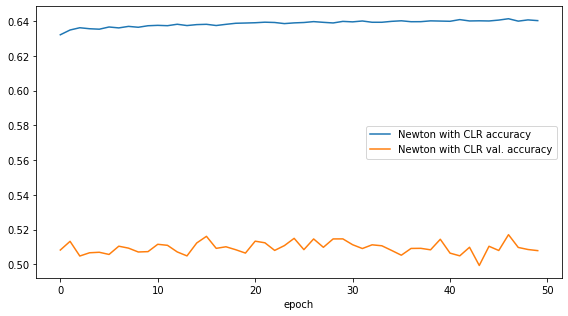

In [129]:
clr_fail_df = pd.read_csv(newton_logs_data_path + "/clr_001-1_step26.log")
clr_fail_df = rename_df_all(clr_fail_df, "Newton with CLR")
plot_accuracy(clr_fail_df)
clr_fail_df.head()

# Learning rate graphs

In [165]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

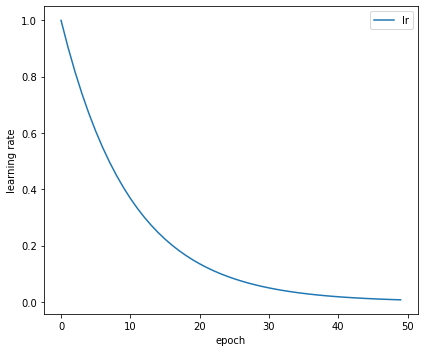

In [159]:
exp_lr_from1_df = pd.read_csv(os.getcwd() + "/exp_lr_from1.csv")
df_plot = exp_lr_from1_df[["lr", "epoch"]]
ax = df_plot.set_index('epoch').plot()

plt.ylabel("learning rate")

plt.savefig("/Users/danylomovchan/Downloads/" + "exp_lr" + ".pdf")

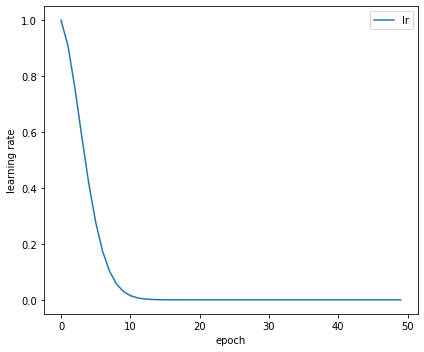

In [160]:
time_lr_from1_df = pd.read_csv(os.getcwd() + "/time_lr_from1.csv")
df_plot = time_lr_from1_df[["lr", "epoch"]]
ax = df_plot.set_index('epoch').plot()

plt.ylabel("learning rate")

plt.savefig("/Users/danylomovchan/Downloads/" + "time_lr" + ".pdf")

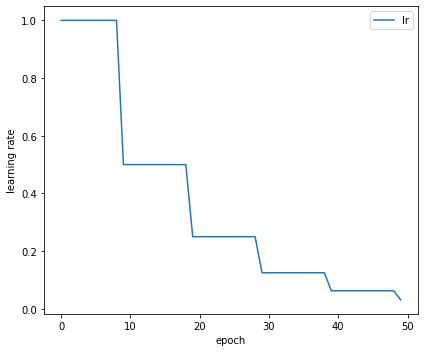

In [163]:
step_lr_from1_df = pd.read_csv(os.getcwd() + "/step_lr_from1.csv")
df_plot = step_lr_from1_df[["lr", "epoch"]]
ax = df_plot.set_index('epoch').plot()

plt.ylabel("learning rate")

plt.savefig("/Users/danylomovchan/Downloads/" + "step_lr" + ".pdf")

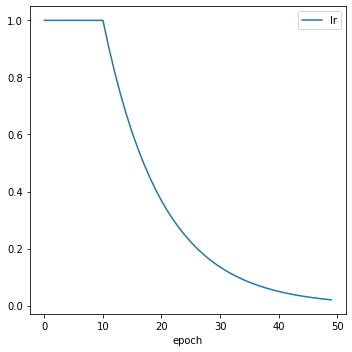

In [91]:

const10exp_lr_from1_df = pd.read_csv(os.getcwd() + "/const10exp_lr_from1.csv")
df_plot = const10exp_lr_from1_df[["lr", "epoch"]]
ax = df_plot.set_index('epoch').plot()

plt.savefig("/Users/danylomovchan/Downloads/" + "const10exp_lr" + ".png")

# LR test

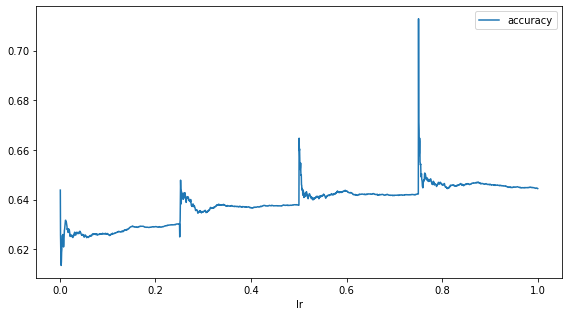

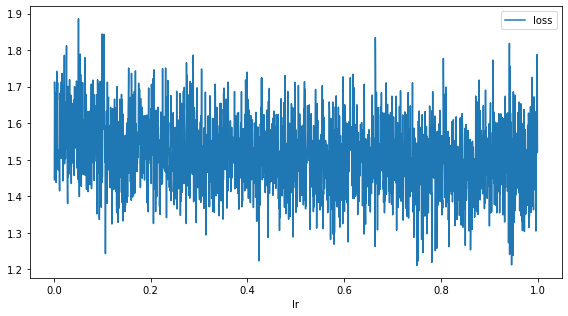

In [154]:
lr_test_df = pd.read_csv(os.getcwd() + "/test_lr_final.csv")
lr_test_df_acc = lr_test_df[["lr", "accuracy"]]
ax1 = lr_test_df_acc.set_index('lr').plot()

lr_test_df_loss = lr_test_df[["lr", "loss"]]
ax2 = lr_test_df_loss.set_index('lr').plot()


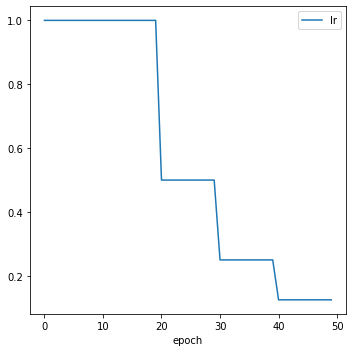

In [172]:
step_lr_from1_df = pd.read_csv(os.getcwd() + "/test_log.csv")
df_plot = step_lr_from1_df[["lr", "epoch"]]
ax = df_plot.set_index('epoch').plot()